# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_excel('/content/Concrete_Data.xls')

# Data Preprocessing

In [7]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
df.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

In [10]:
df.head()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [11]:
df.isnull().sum()

,0
cement,0
blastFurnace,0
flyAsh,0
water,0
superplasticizer,0
courseAggregate,0
fineaggregate,0
age,0
strength,0


In [15]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   blastFurnace      1005 non-null   float64
 2   flyAsh            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   courseAggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   int64  
 8   strength          1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [19]:
df.describe()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# EDA

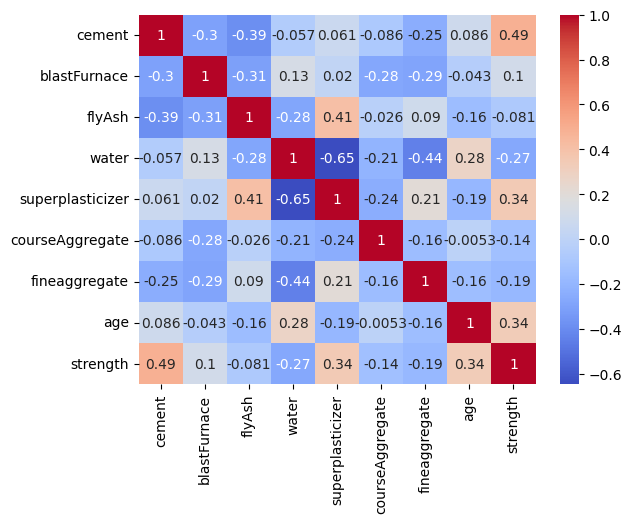

In [26]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# splitting

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('strength', axis=1)
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Distribution without transformation

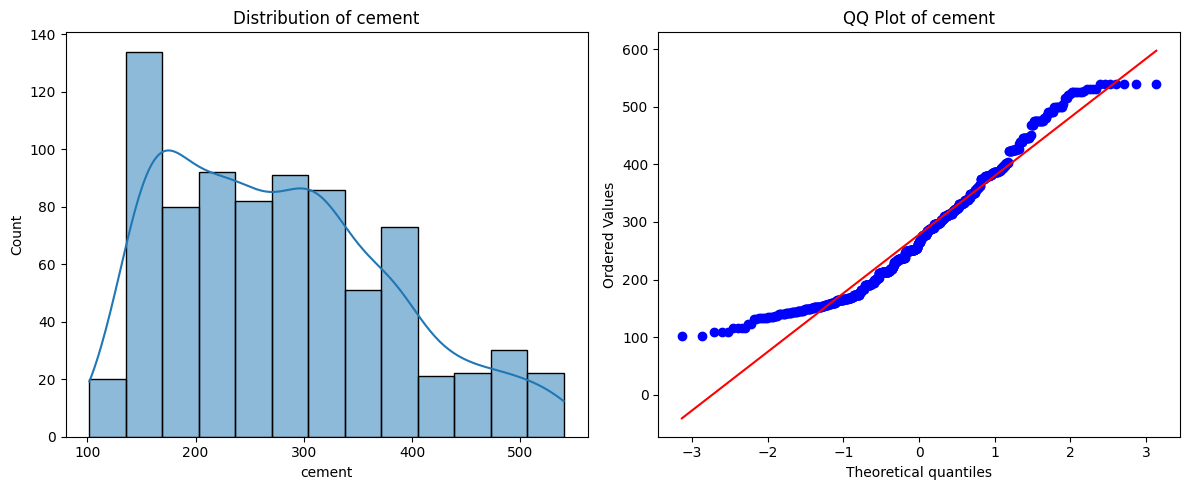

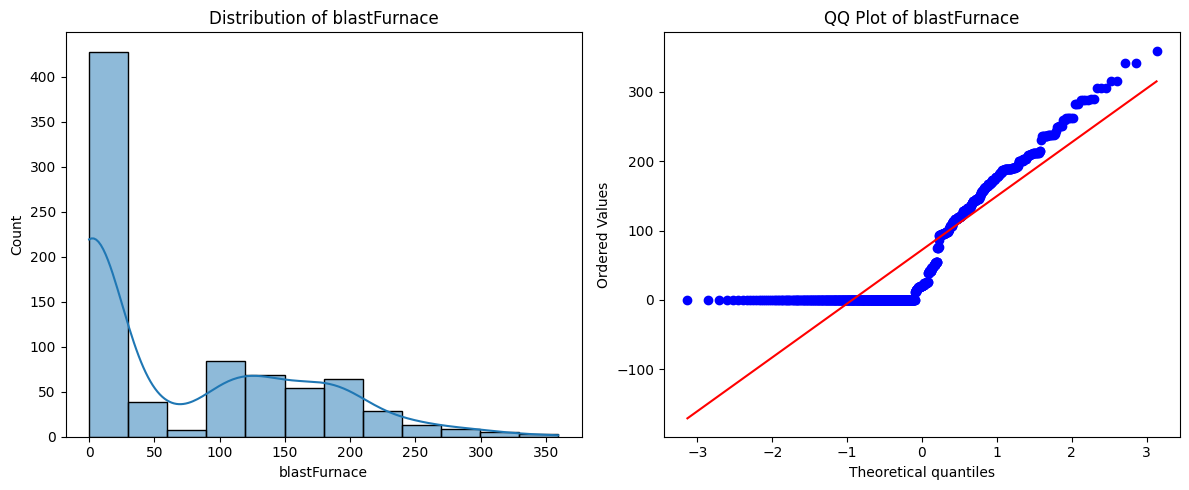

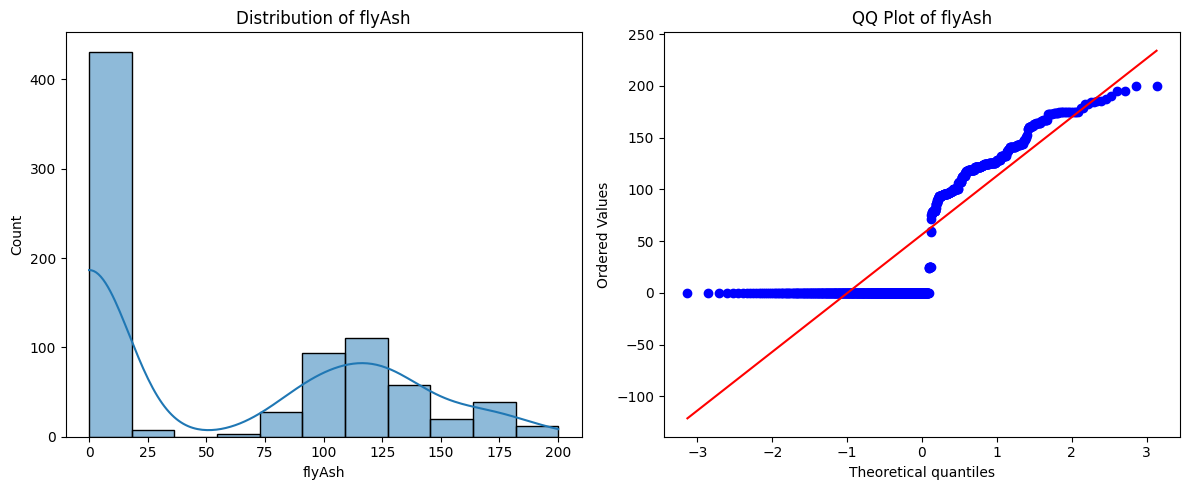

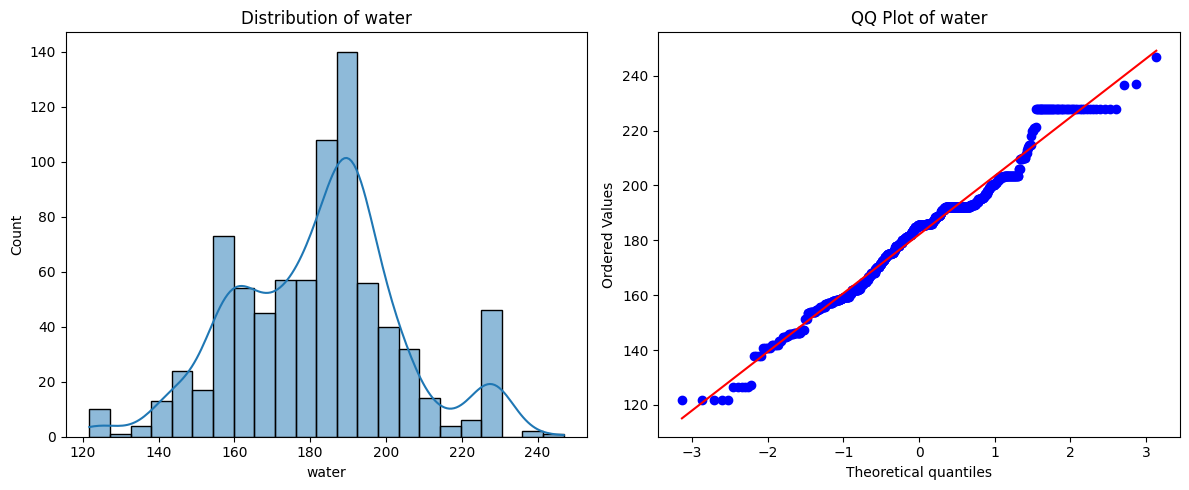

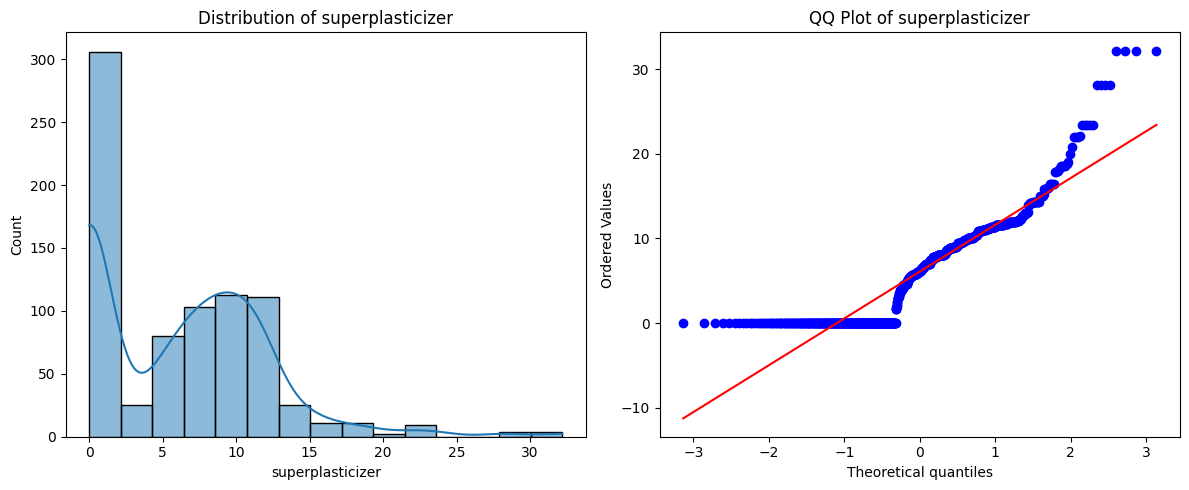

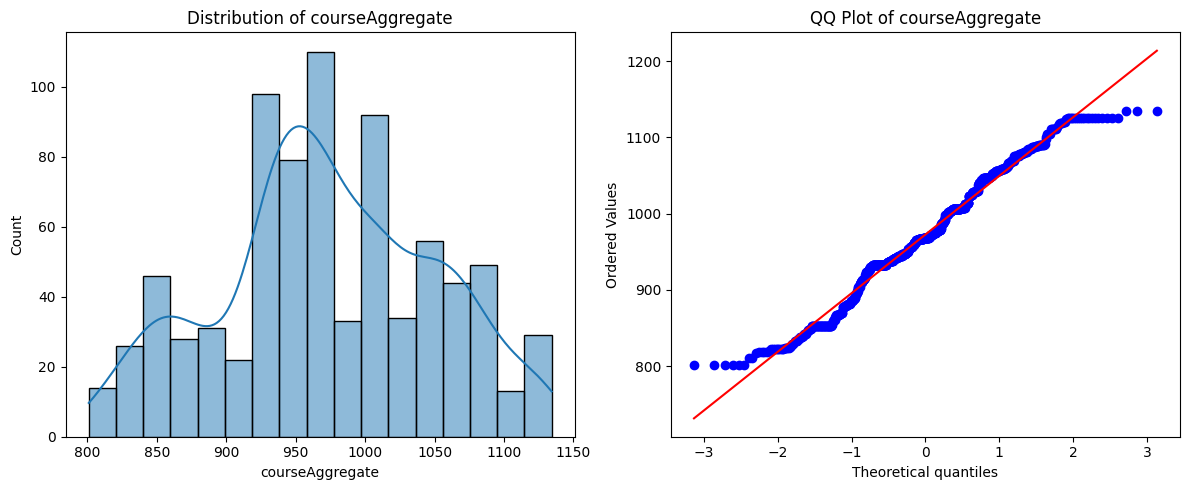

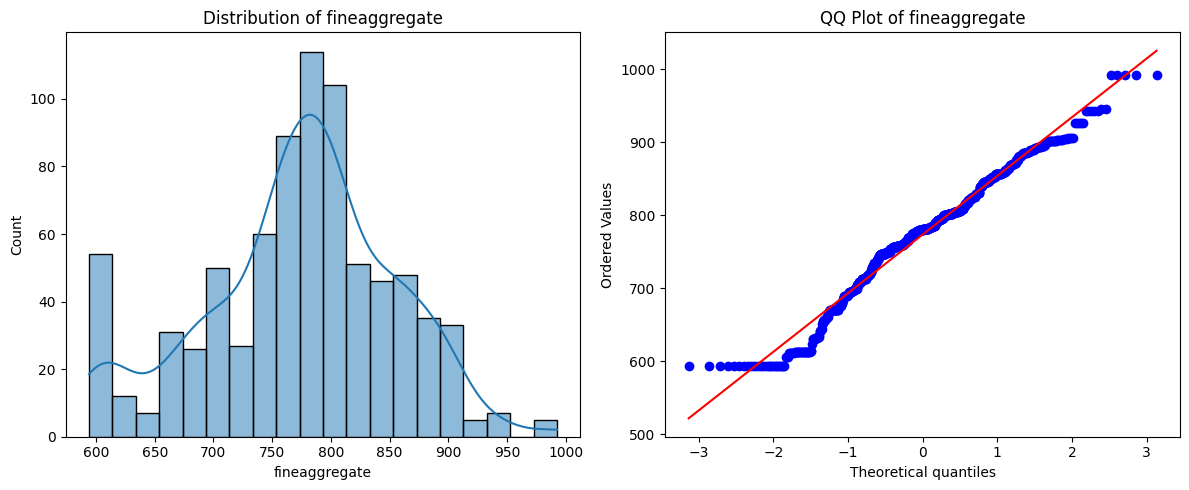

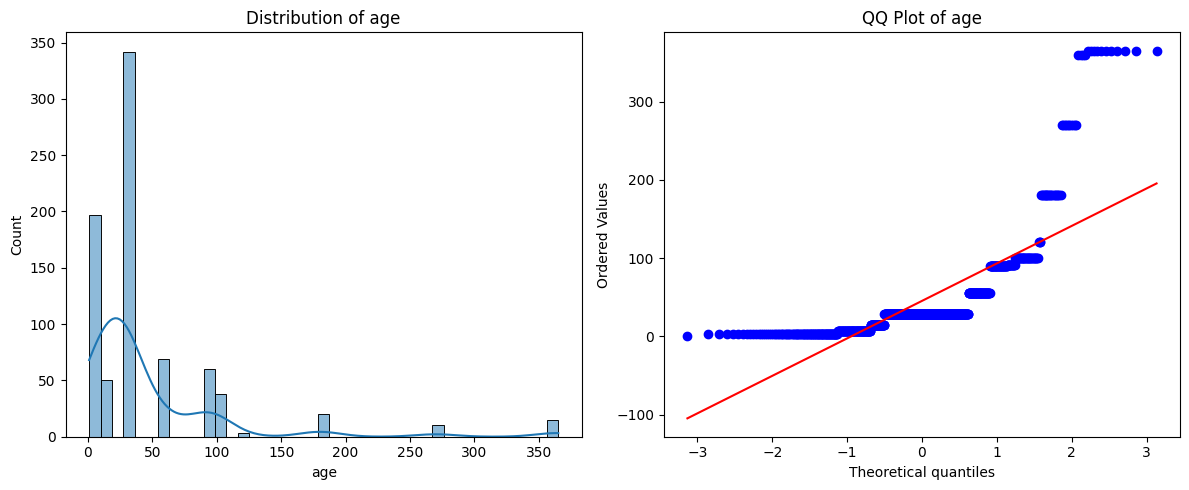

In [31]:
from scipy import stats

for col in X_train.columns:
    plt.figure(figsize=(12, 5))  # Wider figure to accommodate both plots side-by-side

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')

    # QQ plot
    plt.subplot(1, 2, 2)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(f'QQ Plot of {col}')

    # Show both plots together
    plt.tight_layout()
    plt.show()



# After Transformation

In [32]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

In [33]:
X_train_transformed

array([[ 1.94541234, -1.04638381, -0.9277296 , ..., -1.549306  ,
         1.56278688, -1.69474448],
       [ 1.62928609, -1.04638381, -0.9277296 , ..., -0.5317875 ,
        -2.05387584, -1.06695662],
       [ 0.15653118, -1.04638381,  1.01568251, ...,  0.00887019,
         1.30696378, -1.69474448],
       ...,
       [-1.37482381,  1.02880414,  1.06434322, ..., -1.36093955,
         0.60338245,  0.10548578],
       [-1.18523903,  0.97864885,  1.11475438, ...,  0.42361231,
        -0.37848609,  1.24899941],
       [ 0.24397557,  1.16443061, -0.9277296 , ...,  0.40796286,
         0.33733335, -1.06695662]])

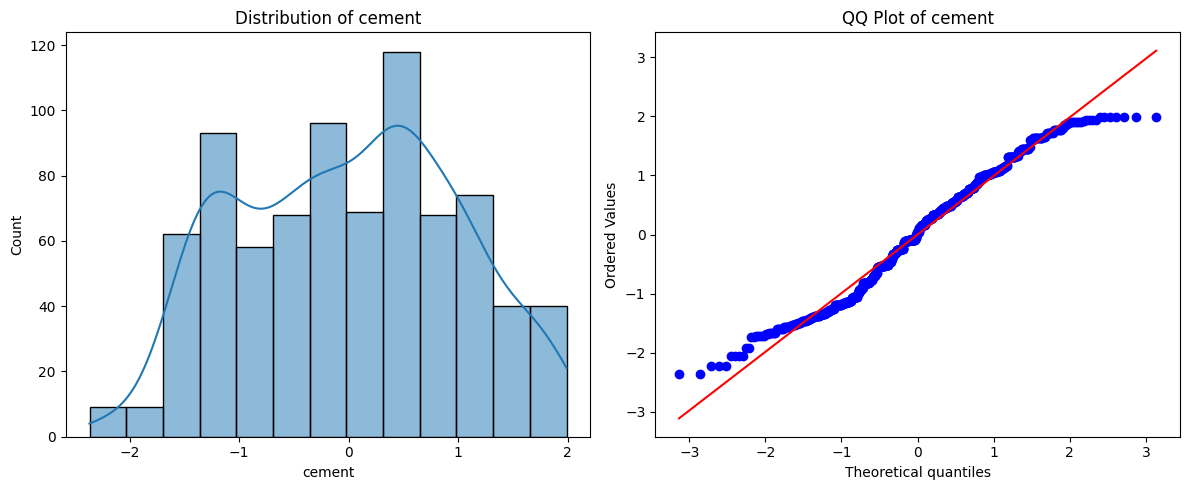

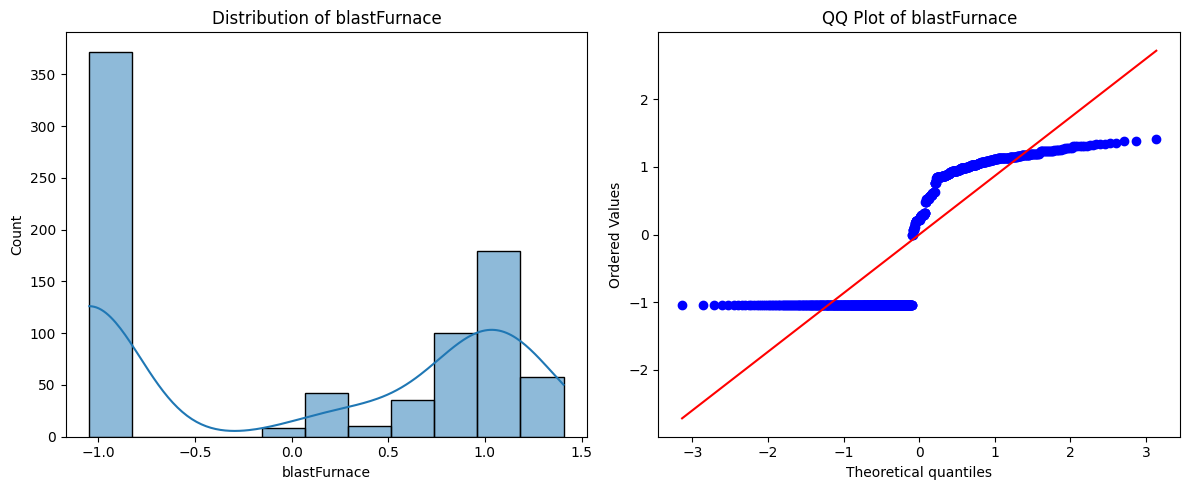

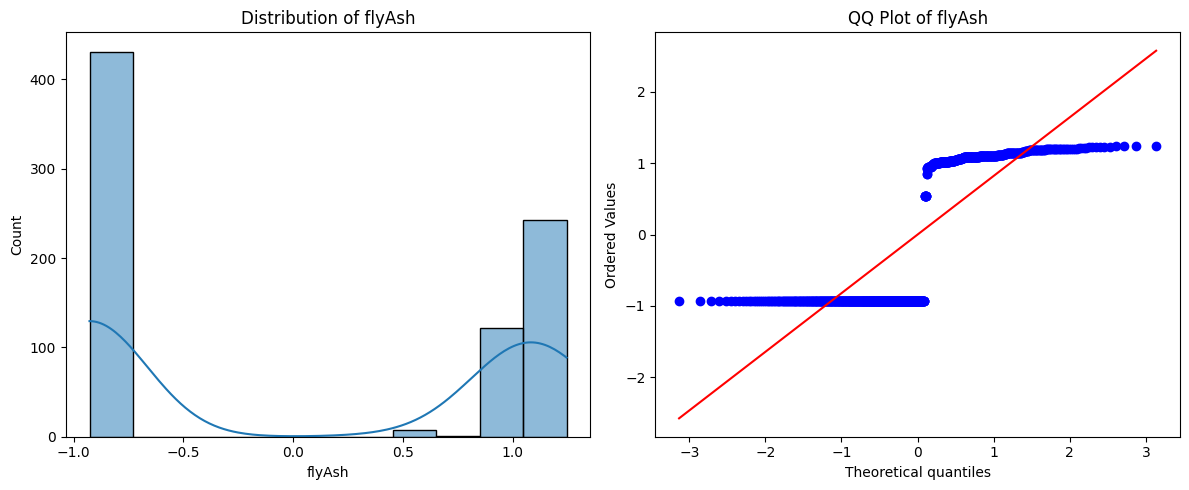

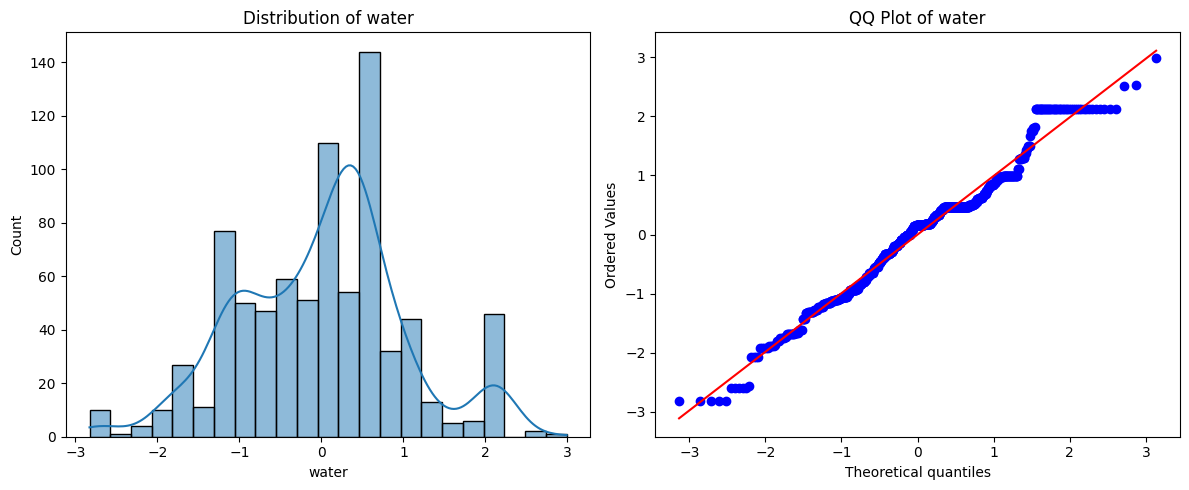

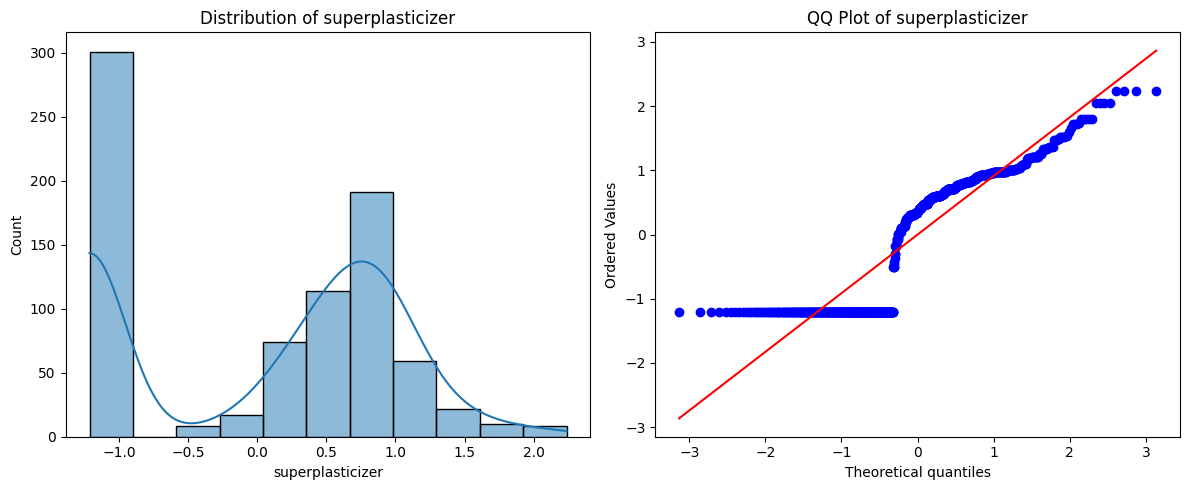

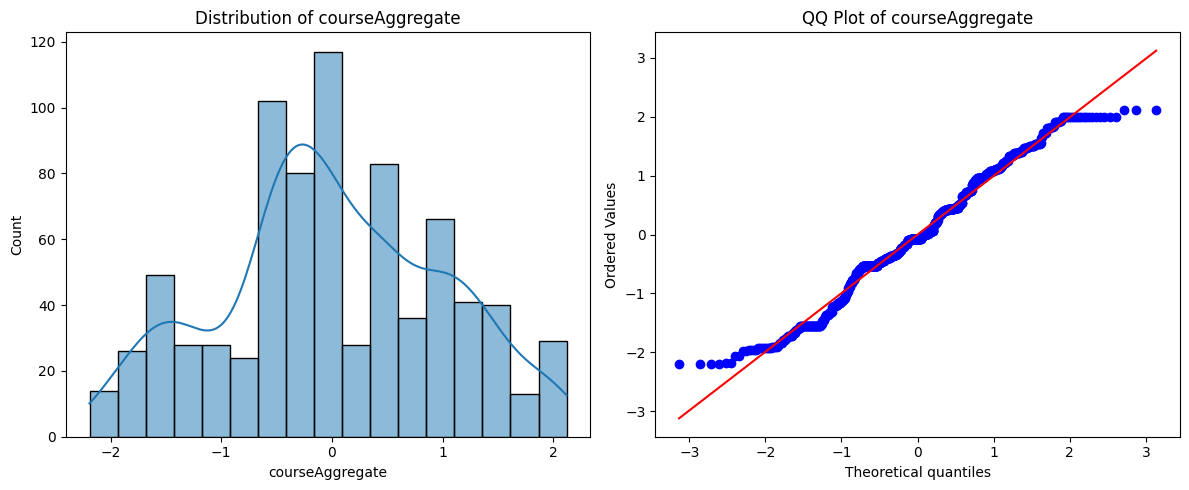

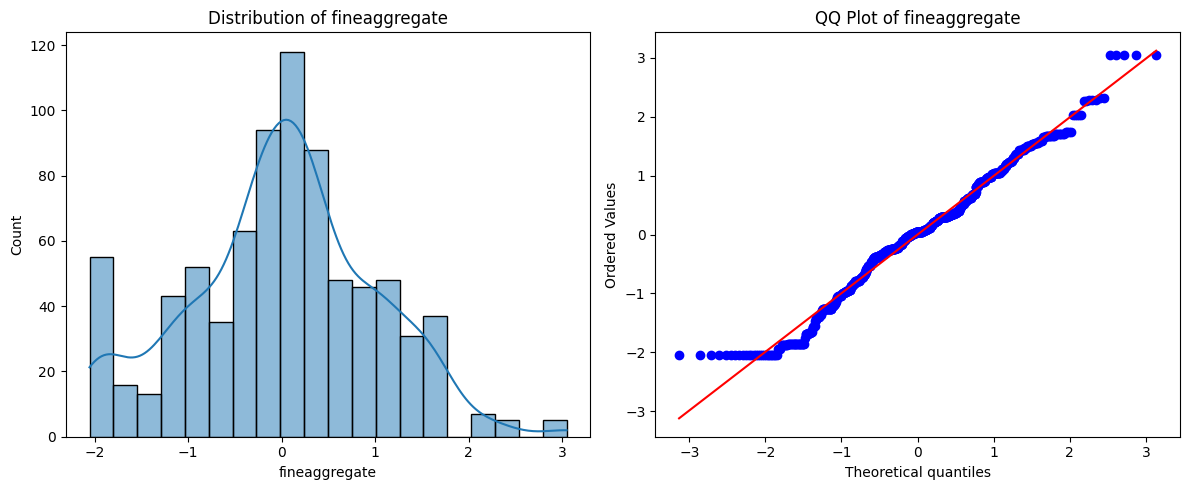

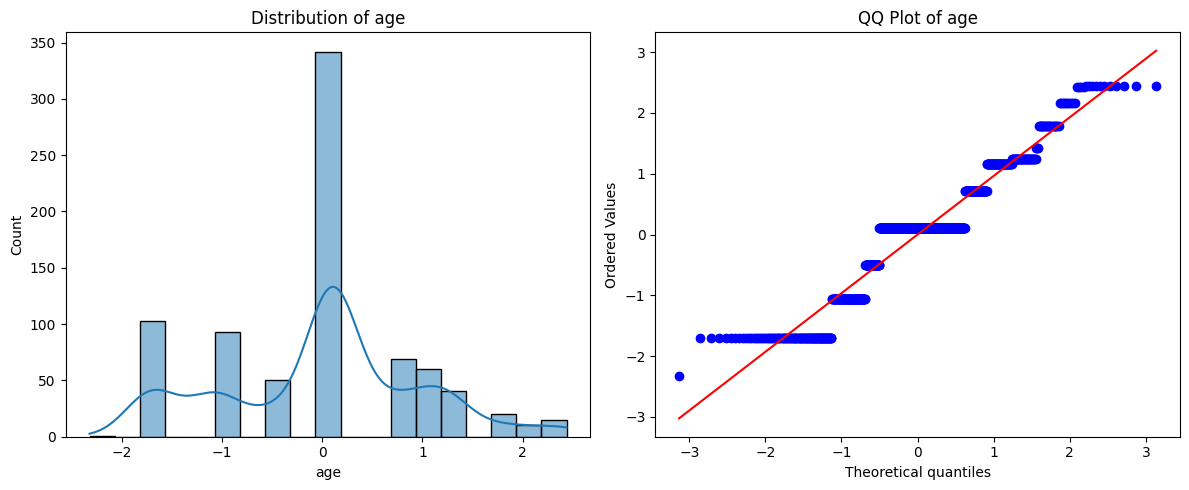

In [34]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(12, 5))  # Wider figure to accommodate both plots side-by-side

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(f'Distribution of {col}')

    # QQ plot
    plt.subplot(1, 2, 2)
    stats.probplot(X_train_transformed[col], dist='norm', plot=plt)
    plt.title(f'QQ Plot of {col}')

    # Show both plots together
    plt.tight_layout()
    plt.show()



In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
X_test_scaled

array([[-1.37973198,  1.02794381, -0.9277296 , ...,  0.34409953,
         0.57954749,  0.10548578],
       [-1.92245068,  1.12762268, -0.9277296 , ..., -0.19426741,
         0.29078421,  0.10548578],
       [-1.37482381,  0.88292661, -0.9277296 , ..., -1.09436536,
         2.28564001,  1.15316971],
       ...,
       [ 0.1578741 ,  0.86560981,  0.53347802, ...,  1.15666732,
         0.06544953,  1.24899941],
       [-0.52382158,  0.86662369,  0.53437617, ...,  1.2133796 ,
         0.10420979, -1.69474448],
       [ 0.98096894, -1.04638381, -0.9277296 , ...,  0.3936208 ,
        -0.18572069, -1.69474448]])

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [44]:
model = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

for name, algo in model.items():
    algo.fit(X_train_scaled, y_train)
    y_pred = algo.predict(X_test_scaled)
    print(f"{name} MSE: {mean_squared_error(y_test, y_pred)},R2 Score: {r2_score(y_test, y_pred)}")
    print("\n")

Linear Regression MSE: 61.001910996429764,R2 Score: 0.7955207742138029


Decision Tree MSE: 38.33264673498155,R2 Score: 0.8715084527898878


Random Forest MSE: 25.999382534807793,R2 Score: 0.9128497202006045


XGBoost MSE: 20.59653227793477,R2 Score: 0.9309601468990207




# Selecting best Model

In [45]:
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.9309601468990207

# prediction Model

In [49]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xgb.predict(features).reshape(1,-1)

    return prediction[0]

In [48]:
X_train

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age
79,531.30,0.00,0.00,141.80,28.20,852.1,893.70,3
29,475.00,0.00,0.00,228.00,0.00,932.0,594.00,7
304,277.05,0.00,97.39,160.60,11.83,973.9,875.61,3
531,436.00,0.00,0.00,218.00,0.00,838.4,719.70,28
676,166.80,250.20,0.00,203.50,0.00,975.6,692.60,7
...,...,...,...,...,...,...,...,...
115,337.90,189.00,0.00,174.90,9.50,944.7,755.80,7
294,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,3
885,153.00,145.00,113.00,178.00,8.00,867.0,824.00,28
459,165.00,128.50,132.10,175.06,8.08,1005.8,746.60,100


In [50]:
cem = 158.60
blastf = 148.90
flyas = 116.00
water = 175.10
superplaster = 15.00
courseagg = 953.3
fineagg = 719.70
age = 28

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [48.980663]


In [53]:
df.iloc[995]

,1020
cement,288.400000
blastFurnace,121.000000
flyAsh,0.000000
water,177.400000
superplasticizer,7.000000
courseAggregate,907.900000
fineaggregate,829.500000
age,28.000000
strength,42.140084


In [54]:
import pickle
pickle.dump(xgb,open('model.pkl','wb'))